# <span style="color: green;">GRIP- THE SPARKS FOUNDATION </span>
## Data Science & Business Analytics Internship
## K- Means Clustering 
## NAME- Nikhil Waghalkar

### -------------------------------------------------------------------------------------------------------------------------------------------------------------------
# TASK-2 : Prediction using Unsupervised ML
## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

##### 1. Import the required libraires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

##### 2. Importing Data and EDA

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print("Data imported...👍")

Data imported...👍


In [3]:
iris_df.head() # seeing some head of data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.shape

(150, 4)

##### 2.1 Checking for null values

In [5]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

##### 2.2 Data visualization 

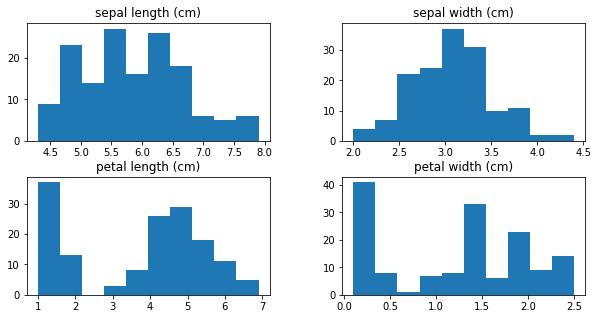

In [6]:
iris_df.hist(grid=False,figsize=(10,5))
plt.show()

##### 3. Finding the optimum number of clusters for k-means classification

In [7]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,max_iter = 300, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

##### 3.1 Plotting the results onto a line graph

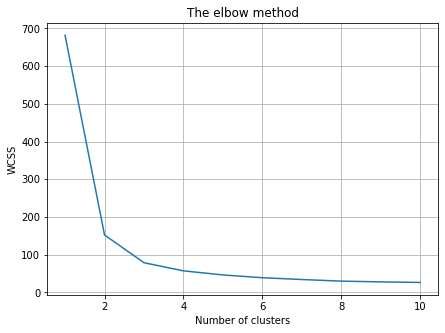

In [8]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
# Within cluster sum of squares
plt.ylabel("WCSS") 
plt.grid()
plt.show()

##### 3.2 Applying kmeans to the dataset / Creating the kmeans classifier

In [9]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


##### 3.3 Visualising the clusters - On the first two columns

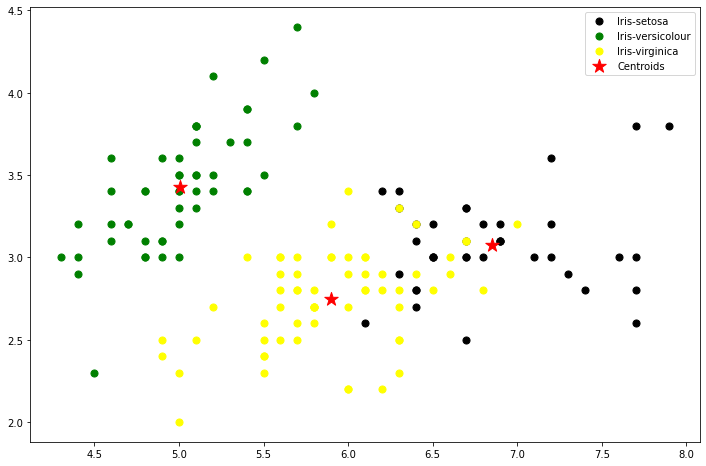

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = "black", label = "Iris-setosa")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = "green", label = "Iris-versicolour")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 50, c = "yellow", label = "Iris-virginica")

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = "red", label = "Centroids",marker="*")
plt.legend()
plt.show()